Assemble a climatology for the same time frame as Puget Sound covering the Fraser River. This will be compatible with processing using the WYMultipliers notebook.

Download data for station ID 08MF005 from the Canada Water Office in Date-Data format.

In [1]:
data_f = 'flowdata/fraser_20240501T1650.csv'

from calendar import month_abbr, monthrange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
fraser = pd.read_csv(data_f, skiprows=1, index_col='Date', parse_dates=True)
fraser.head()

,ID,PARAM,Value,SYM
Date,,,,
1912-03-01,08MF005,1,538.0,NaN
1912-03-02,08MF005,1,538.0,NaN
1912-03-03,08MF005,1,538.0,NaN
1912-03-04,08MF005,1,538.0,NaN
1912-03-05,08MF005,1,538.0,NaN


In [3]:
fraser_flows = fraser.loc[fraser["PARAM"] == 1].rename(columns={'Value': 'Flow'})
fraser_flows.head()

,ID,PARAM,Flow,SYM
Date,,,,
1912-03-01,08MF005,1,538.0,NaN
1912-03-02,08MF005,1,538.0,NaN
1912-03-03,08MF005,1,538.0,NaN
1912-03-04,08MF005,1,538.0,NaN
1912-03-05,08MF005,1,538.0,NaN


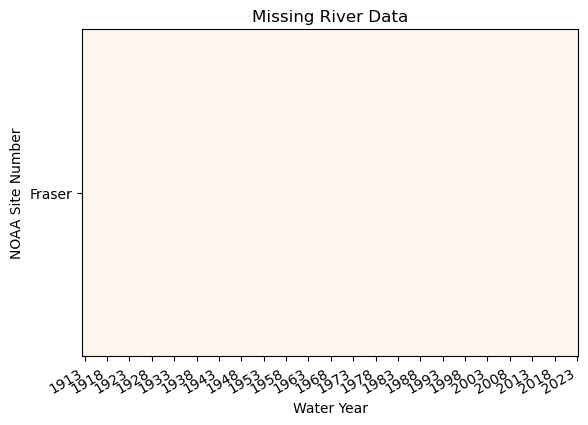

In [4]:
def show_missing_data(df, sites=None):
    if sites is None:
        sites = df.columns
    fig, ax = plt.subplots()
    ax.imshow(np.array([df[s].isna().astype(int) for s in sites]), aspect='auto', interpolation='none', cmap='Reds', vmin=0, vmax=1)
    ax.set_yticks(range(len(sites)))
    ax.set_yticklabels([str(s) for s in sites])

    # Find the indices of Oct 1 of each year
    junk, wy_starts = np.nonzero([(df.index.month == 10) & (df.index.day == 1)])
    ax.xaxis.set_major_locator(mticker.FixedLocator(wy_starts[0::5]))

    ax.xaxis.set_major_formatter(lambda x, pos: df.index[x].year+1)
    ax.set(title="Missing River Data", xlabel="Water Year", ylabel="NOAA Site Number")
    fig.autofmt_xdate()
    return fig, ax

fraser_flow_series = fraser_flows[['Flow']].rename(columns={'Flow': 'Fraser'})
show_missing_data(fraser_flow_series);

In [5]:
fraser_flow_series.to_excel('data/fraser_climatology.xlsx')